In [ ]:
* 분석절차
1. EDA(탐색적 데이터 분석)
  - target 피쳐 확인 / 분리
  - info(), shape, head() - dataframe 타입별(수치형/object)

2. 결측치 확인(1.삭제 2.대체값 3.예측)
  - 결측값 대체(수치형:평균 / Object형:'None')
  - 확인방법 : Boxplot, hist, IQR
    
3. 차트 그리기 준비 작업
  - object형 시각화 --> 필요시 수치형 피쳐로 변환
  - unique ID 피쳐 삭제
    
4. 피쳐 전처리(PreProcessing/Feature Engineering)
  - 수치형 피쳐로 변환 (pd.getDummy)
  - OneHot인코딩(수치형)
  - 스케일/정규화: StandardScaler, MinMaxScaler, RobustScaler

---------------------- 분석하기 좋은 데이터 -------------------------

5. 수치형 피쳐 상관분석(1.결측x 2.objectx)
  - target(SalePrice)에 영향을 주는 상위 n개 피쳐에 대해서만 상관 분석
  - target(SalePrice)에 영향을 주는 상위 n개 피쳐에 대해서만 데이터 분포도(산점도) 확인
  - target(SalePrice)에 영향을 주는 상위 n개 피쳐에 대해서만 Boxplot(outlier) 확인
    
6. 불필요한 피쳐 삭제
   
7. 학습모델 선정 / 평가

8. 검증 / 튜닝


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1. EDA
- info(), shape(), head() - dataframe
- 차트 : 일변량/이변량/다변량
- unique 피쳐 삭제

In [2]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

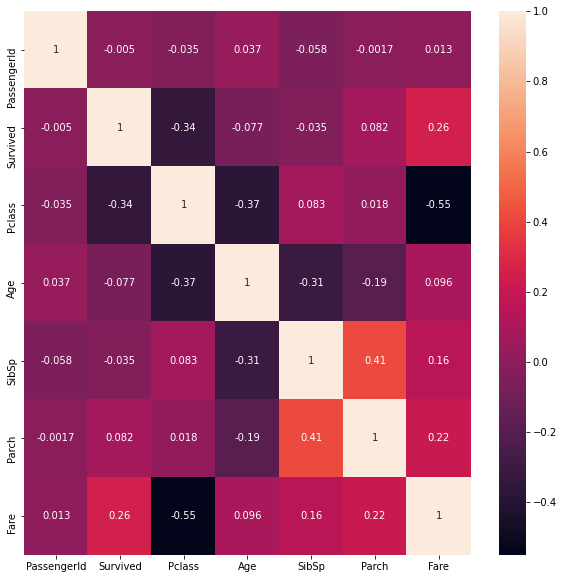

In [4]:
#데이터 분석 전 상관관계도 작성
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, fmt=".2g")
#Pclass-Survived/ Pclass-Fare 상관성 확인

In [5]:
#Unique한 feature 삭제 
new_df = df.drop("PassengerId", axis=1)
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None


In [6]:
#target feature 선정
X = new_df.drop("Survived", axis=1) #문제
y = new_df["Survived"] #답안
print(X[:2])
print(y[:2])

   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
1      1      0   PC 17599  71.2833   C85        C  
0    0
1    1
Name: Survived, dtype: int64


### 2. 결측처리
- 1. 삭제 2. 대체값 3. 예측

In [7]:
#결측 확인 -> Age:177/ Cabin:687/ Embarked:2
print(X.isnull().sum())

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


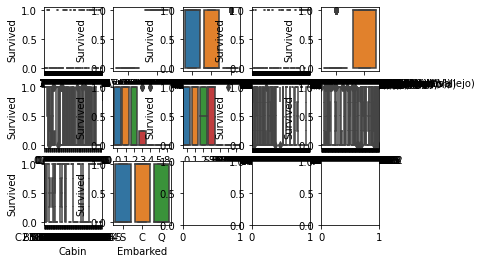

In [8]:
# #이상치 확인
#boxplot
fig, axes = plt.subplots(nrows=3, ncols=5)
columns = df.columns
for i, col in enumerate(columns):
    r = int(i/5)
    c = i%5
    sns.boxplot(x=col, y='Survived', data=df, ax=axes[r][c])
plt.show()

<AxesSubplot:>

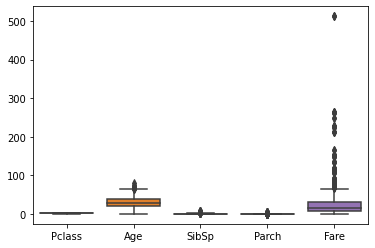

In [9]:
sns.boxplot(data=X)

In [10]:
#IQR
def get_outlier(df=None, column=None):
    Q1 = np.percentile(df[column].values, 25)
    Q3 = np.percentile(df[column].values, 75)
    IQR = Q3 - Q1
    IQR_weight = IQR * 1.5
    minimum = Q1 - IQR_weight
    maximum = Q3 + IQR_weight
    outlier_idx = df[column][(df[column] < minimum) | (df[column] > maximum)].index
    return outlier_idx

In [11]:
#함수 사용해서 이상치 제거
numeric_columns = X.dtypes[X.dtypes!='object'].index
for i, col in enumerate(numeric_columns) :
    outlier_idx = get_outlier(df=X, column=col)
    print(col, outlier_idx)
#단 여기서는 outlier 제거하지 않고 진행(데이터가 너무 빈약해질 수 있어서)

Pclass Int64Index([], dtype='int64')
Age Int64Index([], dtype='int64')
SibSp Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')
Parch Int64Index([  7,   8,  10,  13,  16,  24,  25,  27,  43,  50,
            ...
            855, 856, 858, 863, 869, 871, 879, 880, 885, 888],
           dtype='int64', length=213)
Fare Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)


In [12]:
#Name에서 Age평균값 추출 -> null값 채워넣기
X["Name2"] = X["Name"].str.extract("([A-Za-z]+)\.")
X["Name2"].value_counts() #Mr, Miss, Mrs, Master/ 기타 호칭을 -> other로 통일

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Lady          1
Capt          1
Countess      1
Sir           1
Don           1
Mme           1
Jonkheer      1
Name: Name2, dtype: int64

In [13]:
X["Name2"].replace(["Dr", "Sir", "Ms", "Lady"], ["Mr", "Mr", "Miss", "Miss"], inplace=True) #성별 구분이 명확한 호칭 대체 
X["Name2"].replace(["Rev", "Col", "Major", "Mlle", "Countess", "Mme", "Capt", "Don", "Jonkheer"], ["Other", "Other", "Other", "Other", "Other", "Other", "Other", "Other", "Other"], inplace=True) #성별 구분이 어려운 호칭 ->Other로 분류
X["Name2"].value_counts()
X.groupby("Name2")["Age"].mean() #나이 평균값 추출

Name2
Master     4.574167
Miss      21.993243
Mr        32.551852
Mrs       35.898148
Other     42.647059
Name: Age, dtype: float64

In [14]:
#나이 평균값으로 Null 대체
X.loc[(X.Name2=="Master") & (X.Age.isnull()), "Age"]=5
X.loc[(X.Name2=="Miss") & (X.Age.isnull()), "Age"]=22
X.loc[(X.Name2=="Mr") & (X.Age.isnull()), "Age"]=33
X.loc[(X.Name2=="Mrs") & (X.Age.isnull()), "Age"]=36
X.loc[(X.Name2=="Other") & (X.Age.isnull()), "Age"]=43
print(X.Age.isnull().sum())

0


In [15]:
#나이 -> 연령대로 카테고리 나눔
X["Age_cate"] = X["Age"].apply(lambda x: int(x//10))
X["Age_cate"].value_counts()

3    304
2    256
1    102
4     89
0     66
5     48
6     19
7      6
8      1
Name: Age_cate, dtype: int64

In [16]:
X["Cabin"].isnull().sum() 
#Cabin의 결측치가 687개로 삭제

687

In [17]:
pd.crosstab([X["Pclass"], X["Embarked"]],y)
#Pclass, Embarked와 Survived의 관계...? 큰 차이가 있어보이진 않음

Survived           0   1
Pclass Embarked         
1      C          26  59
       Q           1   1
       S          53  74
2      C           8   9
       Q           1   2
       S          88  76
3      C          41  25
       Q          45  27
       S         286  67

### 3-1. 피쳐 전처리/가공(PreProcessing / Feature Engineering) - Object 가공
- object 가공
- 라벨 인코딩, pd.getDummy()

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Name2     891 non-null    object 
 11  Age_cate  891 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [19]:
#성별 object형 가공
X["Sex"]=X["Sex"].apply(lambda x:0 if x=="female" else 1)
X["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [20]:
#병합
X["SP"]=X["SibSp"]+X["Parch"]
print(X[["SP", "SibSp", "Parch"]])

     SP  SibSp  Parch
0     1      1      0
1     1      1      0
2     0      0      0
3     1      1      0
4     0      0      0
..   ..    ...    ...
886   0      0      0
887   0      0      0
888   3      1      2
889   0      0      0
890   0      0      0

[891 rows x 3 columns]


### 3-2. 피쳐 전처리/가공(PreProcessing/Feature Engineering) - Numeric 가공
  - 수치형 피쳐로 변환 (pd.getDummy)
  - OneHot인코딩(수치형)
  - 스케일/정규화: StandardScaler, MinMaxScaler, RobustScaler

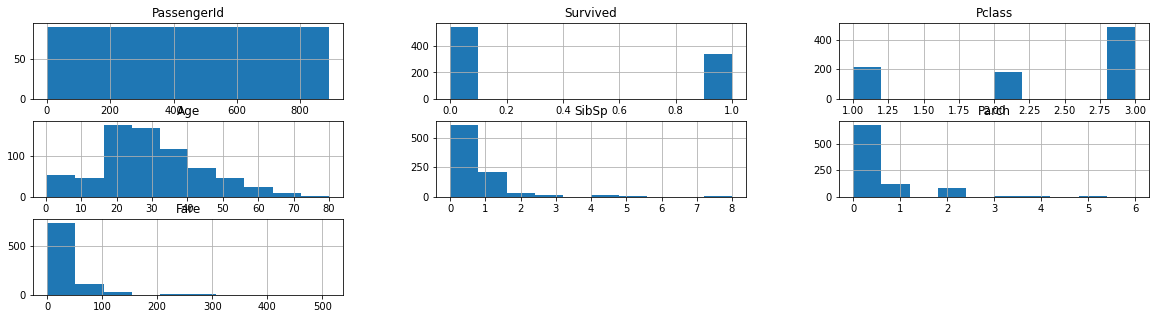

In [21]:
df.hist(figsize=(20,5))
plt.show()

In [26]:
X = pd.get_dummies(data=X, columns=["Age_cate"], prefix="OH_Age_cate", drop_first = False)
print(X.head().T)
#기존파일에서는 X_encoding으로 X와 비교를 했지만 여기에서는 X 원본으로 덮어버림

KeyError: "None of [Index(['Age_cate'], dtype='object')] are in the [columns]"

In [22]:
#後で要確認
# def format_features(df):
#     df['Cabin'] = df['Cabin'].str[:1]
#     features = ['Cabin', 'Sex', 'Embarked']
#     for feature in features:
#         le = LabelEncoder()
#         le.fit(df[feature])
#         df[feature] = le.transform(df[feature])
#     return df

In [30]:
#스케일링(Overfitting 방지)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [31]:
scaler = StandardScaler() #Scaler 객체 생성

In [32]:
X_scaler = scaler.fit_transform(X) #StandardScaler로 데이터세트 변환
#"Name2컬럼 삭제해야지 정상 구동됨"
#기존파일에서는 X_scaler로 X와 비교를 했지만 여기에서는 X원본으로 덮어버리려고 했는데 이러고 교차검증 실시하니 nd.array 문제발생;;

### 4. 분석하기 좋은 데이터가 갖춰진 상태 - 상관분석, feature_importance
- 피쳐간 영향도, 피쳐의 중요도

<AxesSubplot:>

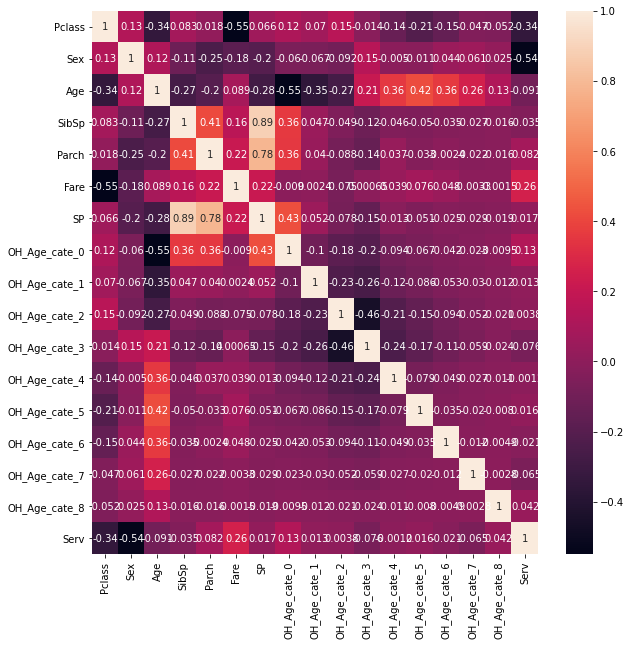

In [27]:
head_df = X.copy()
head_df["Serv"] = y
plt.figure(figsize=(10,10))
sns.heatmap(data=head_df.corr(), annot=True, fmt=".2g")
#Serv-Sex(-0.54), Serv-Pclass(-0.34) 연관성

### 5. 불필요한 피쳐 삭제

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Name           891 non-null    object 
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Ticket         891 non-null    object 
 7   Fare           891 non-null    float64
 8   Cabin          204 non-null    object 
 9   Embarked       889 non-null    object 
 10  Name2          891 non-null    object 
 11  SP             891 non-null    int64  
 12  OH_Age_cate_0  891 non-null    uint8  
 13  OH_Age_cate_1  891 non-null    uint8  
 14  OH_Age_cate_2  891 non-null    uint8  
 15  OH_Age_cate_3  891 non-null    uint8  
 16  OH_Age_cate_4  891 non-null    uint8  
 17  OH_Age_cate_5  891 non-null    uint8  
 18  OH_Age_cat

In [29]:
replace_col = ["Name", "Name2", "Age", "SibSp", "Parch"]
del_col = ["Ticket", "Fare", "Cabin", "Embarked"]
drop_col = replace_col + del_col
X.drop(drop_col, axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pclass         891 non-null    int64
 1   Sex            891 non-null    int64
 2   SP             891 non-null    int64
 3   OH_Age_cate_0  891 non-null    uint8
 4   OH_Age_cate_1  891 non-null    uint8
 5   OH_Age_cate_2  891 non-null    uint8
 6   OH_Age_cate_3  891 non-null    uint8
 7   OH_Age_cate_4  891 non-null    uint8
 8   OH_Age_cate_5  891 non-null    uint8
 9   OH_Age_cate_6  891 non-null    uint8
 10  OH_Age_cate_7  891 non-null    uint8
 11  OH_Age_cate_8  891 non-null    uint8
dtypes: int64(3), uint8(9)
memory usage: 28.8 KB


### 6. 학습모델 선정 / 평가
 - 분석 방법 : 회귀, 분류, 군집
 - 분석 모델 : RandomForest(), DecisionTreeClassifier()
 - 평가 모형 : f1, accuracy, auc, recall
 
 -> 코딩 fit(), predict(), score()

In [33]:
#분석(모델선정 /평가척도 /검증)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121, shuffle=True)
#StandardScaler로 스케일링한 데이터를 넣어줌

In [52]:
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

models = [dt_model, knn_model, rf_model]

for model in models :
    model.fit(X_train,y_train) #학습
    y_pred = model.predict(X_test) #시험
    score1 = accuracy_score(y_test, y_pred) #예측 정확도 확인
    print(model, ":", score1)
    score2 = f1_score(y_test, y_pred)
    print(model, ":", score2)
    
#accuracy > f1?

DecisionTreeClassifier() : 0.8258426966292135
DecisionTreeClassifier() : 0.7596899224806201
KNeighborsClassifier() : 0.8033707865168539
KNeighborsClassifier() : 0.7445255474452555
RandomForestClassifier() : 0.8595505617977528
RandomForestClassifier() : 0.8148148148148149


### 7-1. 검증1 /튜닝
- 학습량 증가 : KFold(), cross_val_score()
- 학습량 증가 + 튜닝 : GridSearchCV()

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [41]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=121)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [66]:
accuracy_score_list = []
f1_score_list = []

for i, (idx_train, idx_test) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[idx_train], X.iloc[idx_test]
    y_train, y_test = y.iloc[idx_train], y.iloc[idx_test]
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracy_score_list.append(accuracy)
    f1 = f1_score(y_pred, y_test)
    f1_score_list.append(f1)
    print(i, ":", accuracy, f1)
    
print("KFold 평균 정확도:", np.mean(accuracy_score_list))
print("KFold 평균 F1:", np.mean(f1_score_list))

0 : 0.7486033519553073 0.6762589928057553
1 : 0.7752808988764045 0.6363636363636364
2 : 0.797752808988764 0.7142857142857143
3 : 0.848314606741573 0.8
4 : 0.8539325842696629 0.8059701492537312
KFold 평균 정확도: 0.8047768501663424
KFold 평균 F1: 0.7265756985417674


In [67]:
accuracy_score_list = []
f1_score_list = []

for i, (idx_train, idx_test) in enumerate(skf.split(X,y)):
    X_train, X_test = X.iloc[idx_train], X.iloc[idx_test]
    y_train, y_test = y.iloc[idx_train], y.iloc[idx_test]
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracy_score_list.append(accuracy)
    f1 = f1_score(y_pred, y_test)
    f1_score_list.append(f1)
    print(i, ":", accuracy, f1)
    
print("KFold 평균 정확도:", np.mean(accuracy_score_list))
print("KFold 평균 F1:", np.mean(f1_score_list))

0 : 0.8435754189944135 0.7846153846153846
1 : 0.8202247191011236 0.7500000000000001
2 : 0.8146067415730337 0.7480916030534351
3 : 0.797752808988764 0.7230769230769231
4 : 0.8089887640449438 0.7462686567164178
KFold 평균 정확도: 0.8170296905404557
KFold 평균 F1: 0.7504105134924322


In [65]:
from sklearn.model_selection import cross_val_score

score_list = cross_val_score(rf_model, X, y, scoring= "f1", cv=5, verbose=0)
print("cross_val_score 평균 정확도:", np.mean(score_list))

cross_val_score 평균 정확도: 0.7486481837511586


ここからやり直し

In [69]:
my_hyper_param = { "n_estimators"      : [100], #랜덤포레스트가 가질 수 있는 파라미터를 여기에 지정해서 넣으면 됨
                    "max_depth"        : [3,5,7,9],
                    "min_samples_leaf" : [1,3,5],
                    "random_state"    :  [121,] #bootstrapping : 복원추출(나온번호 또 허용될 수 있음)
                }
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
gcv_model = GridSearchCV(rf_model, param_grid=my_hyper_param, scoring="accuracy", refit=True, cv=5, verbose=0) #refit=true: 가장 잘나온 최적의 모델을 찾아냈으면 바로 예측에 반영시켜라  #cv : 몇번 돌릴건지 #f1이 scoring해주므로 밑에 score해줄 필요 x
#제일 좋은 모델 찾아서 학습 시키고 출력해라
#-------------이하 학습 동일 -----------------------
gcv_model.fit(X_train, y_train)
# predict : 시험
print("best_estimator_", gcv_model.best_estimator_)
print("best_params_",     gcv_model.best_params_) #제일 좋았던 파라미터
print("best_score_",     gcv_model.best_score_) #제일 잘나온 점수

best_estimator_ RandomForestClassifier(max_depth=5, random_state=121)
best_params_ {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 121}
best_score_ 0.834531665517581


### 7-2. 검증2 /튜닝
- confusion matrix
- auc-roc curt
- 분석모델의 타당성 설명

In [ ]:
Q. 
- 순서를 보면 scaling을 한 이후에 불필요한 컬럼을 삭제하라고 하는데 Name2 컬럼때문에 scaling을 먼저 실행하면 오류가 발생
이와 같은 경우는 순서를 바꿔서 하면 되는가?
- boxplot기존 예시 -> sns.boxplot으로 대체해도 괜찮은가
- Name2를 이용한 나이 추출 -> 다른 방법 시도했는데 괜찮은지 체크 받기 
- X_encoding -> X로 다시 뒤엎어서 성능평가하면 ok? / x_scaler로 kfold하려고 하면 nd.array오류 발생 